In [ ]:
!pip install windpowerlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 KB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import data as wt
from windpowerlib import TurbineClusterModelChain,WindTurbine,WindFarm,ModelChain

In [ ]:
Weather_Data = pd.read_csv('weather_montreal.csv',index_col=0,header=[0,1],
                           date_parser=lambda idx:pd.to_datetime(idx,utc=True))
Weather_Data

variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


In [ ]:
Selected_turbine = {'turbine_type':'E48/800','hub_height': 60}
W_Turbine = WindTurbine(**Selected_turbine)

In [ ]:
#wind_turbine_fleet = pd.DataFrame({'wind_turbine':[W_Turbine,None],
#                                   'number_of_turbines':[10,None],})
                                   # 'total_capacity':[8000,None]})

farm_data = {
             'wind_turbine_fleet':[W_Turbine.to_group(10)],
             'efficiency':0.9
}

farm_data_2 = WindFarm(**farm_data)

Wind_Farm_Submodel = {
       'wake_losses_model': 'wind_farm_efficiency',           # 'dena_mean' (default)
       'smoothing': True,                                     # Default is False
       'satandard_deviation_method': 'turbulence_intensity',  # Staffell_Pfenniger
       'wind_speed_model' : 'hellman',
       'density_model' : 'ideal_gas',
       'temperature_model':'linear_gradient',
       'power_output_model':'power_curve',
       'density_correction':True,
       'obstacle_height' : 0,
       'hellman_exp':0.25}

Model_Farm = TurbineClusterModelChain(farm_data_2,**Wind_Farm_Submodel).run_model(Weather_Data)

Farm_Power_Output = (Model_Farm.power_output)/1000

Farm_Power_Output

2019-01-01 00:00:00+00:00    5143.800555
2019-01-01 01:00:00+00:00    5336.078841
2019-01-01 02:00:00+00:00    4558.117848
2019-01-01 03:00:00+00:00    1690.422179
2019-01-01 04:00:00+00:00      30.979601
                                ...     
2019-12-31 19:00:00+00:00     317.855421
2019-12-31 20:00:00+00:00     586.182770
2019-12-31 21:00:00+00:00    1620.965002
2019-12-31 22:00:00+00:00    2868.697185
2019-12-31 23:00:00+00:00    2702.217165
Name: feedin_power_plant, Length: 8760, dtype: float64

In [ ]:
Tubine_Sub_Models = {
    'wind_speed_model': 'hellman',          #'logarithmic' this one is the default
                                            # 'interpolation-extrapolation'
    'density_model': 'ideal_gas',           # 'barometric' (default)
                                            # 'interpolation-extrapolation'
    'temperature_model':'linear_gradient',  # 'interpolation-extrapolation'
    
    'power_output_model' :'power_coefficient_curve',  # 'power_curve' is the default

    'density_correction': True,             # False is default
    'obstacle_height': 0,                   # default is 0
    'hellman_exp': 0.25
}

Model = ModelChain(W_Turbine,**Tubine_Sub_Models).run_model(Weather_Data)

Turbine_Power_Output = (Model.power_output)/1000
Turbine_Power_Output

2019-01-01 00:00:00+00:00    607.007263
2019-01-01 01:00:00+00:00    632.135315
2019-01-01 02:00:00+00:00    518.769474
2019-01-01 03:00:00+00:00    167.707041
2019-01-01 04:00:00+00:00      1.009322
                                ...    
2019-12-31 19:00:00+00:00     28.706123
2019-12-31 20:00:00+00:00     57.379249
2019-12-31 21:00:00+00:00    160.043377
2019-12-31 22:00:00+00:00    289.477526
2019-12-31 23:00:00+00:00    271.784218
Name: feedin_power_plant, Length: 8760, dtype: float64

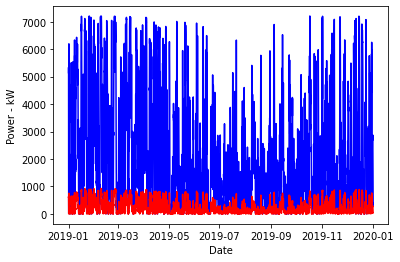

In [ ]:
plt.plot(Farm_Power_Output,color = 'b')
plt.plot(Turbine_Power_Output, color = 'r')
plt.xlabel('Date')
plt.ylabel('Power - kW')
plt.show()